In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import pickle
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error


In [2]:
df = pd.read_csv('Cleaned_Algerian_Forest_Fires.csv')

In [3]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [4]:
df.head(2)

,region,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes_encoded
0,0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,0,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0


In [5]:
df.drop(['day','month'],axis=1,inplace=True)

array([[<Axes: title={'center': 'region'}>,
        <Axes: title={'center': 'Temperature'}>,
        <Axes: title={'center': 'RH'}>],
       [<Axes: title={'center': 'Ws'}>, <Axes: title={'center': 'Rain'}>,
        <Axes: title={'center': 'FFMC'}>],
       [<Axes: title={'center': 'DMC'}>, <Axes: title={'center': 'DC'}>,
        <Axes: title={'center': 'ISI'}>],
       [<Axes: title={'center': 'BUI'}>, <Axes: title={'center': 'FWI'}>,
        <Axes: title={'center': 'Classes_encoded'}>]], dtype=object)

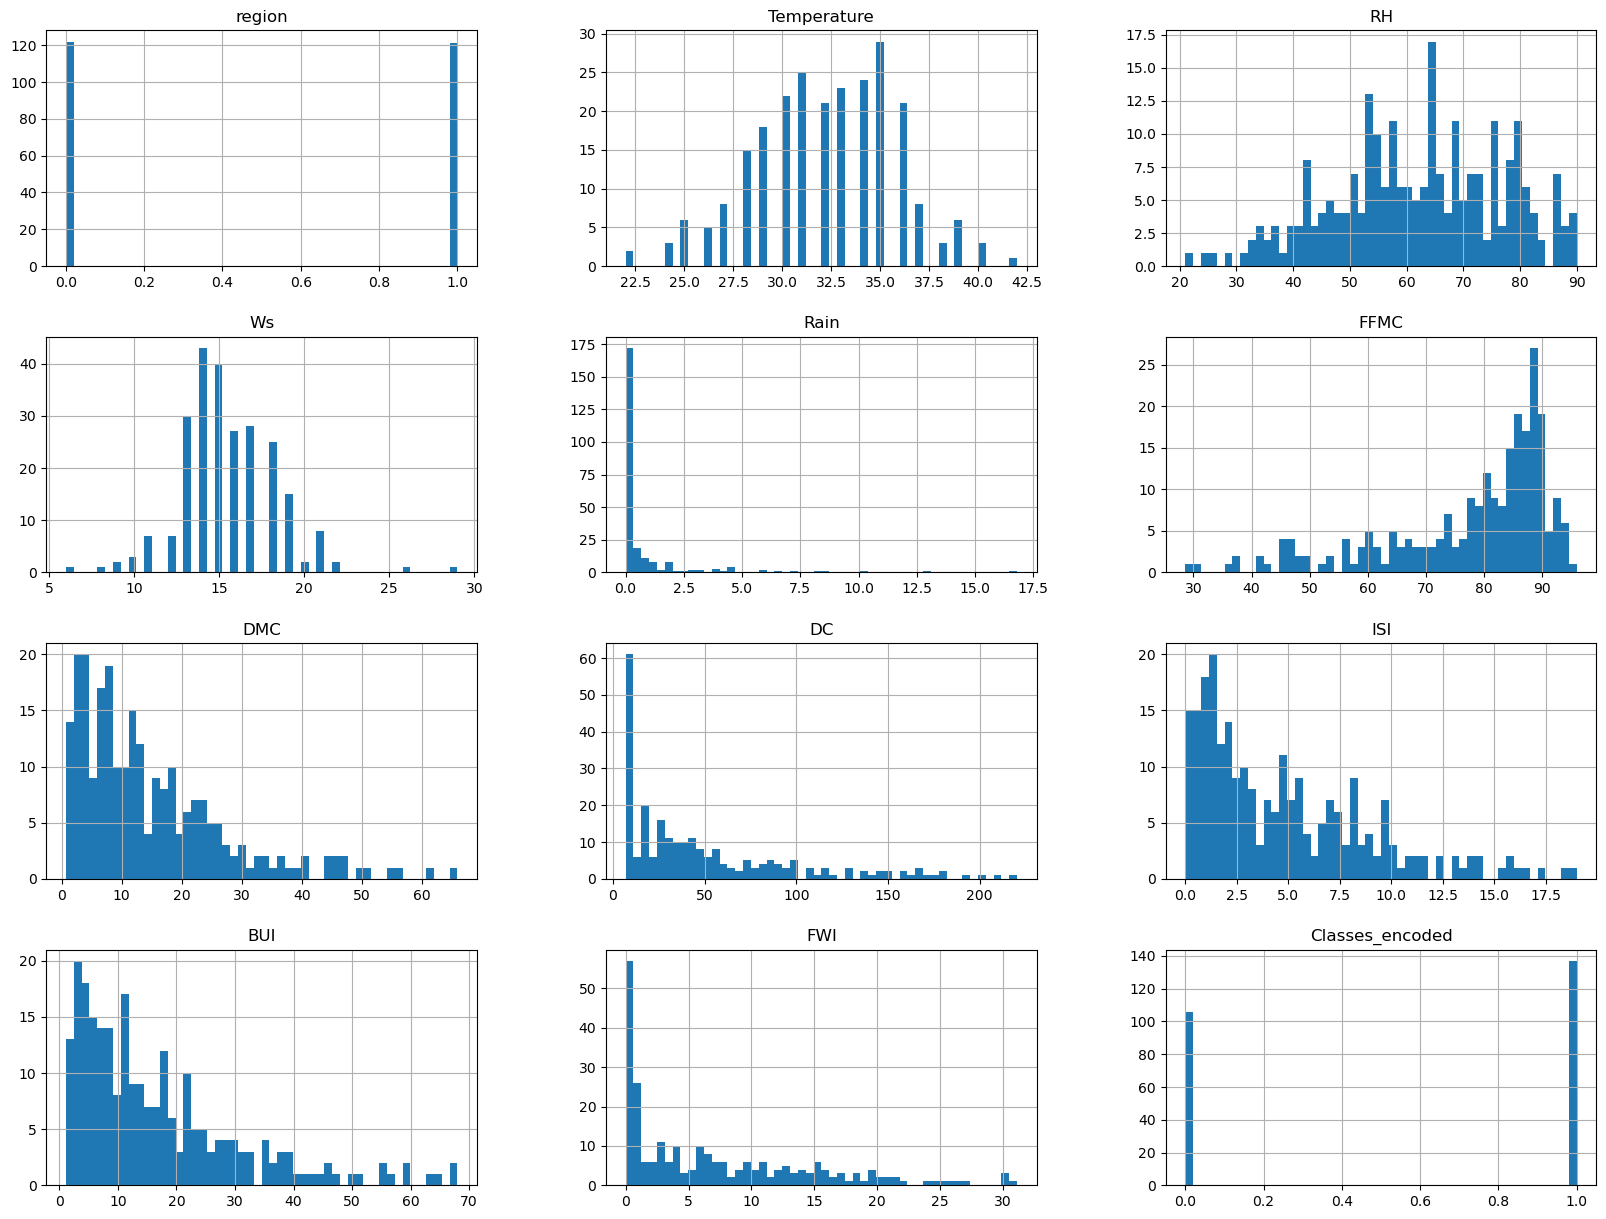

In [6]:
df.hist(bins=50, figsize=(20, 15))

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_Train,Y_test = train_test_split(df.drop('Classes_encoded',axis=1),df['Classes_encoded'],test_size=0.3,random_state=42)


In [8]:
X_train

,region,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
29,0,33,50,14,0.0,88.7,22.9,92.8,7.2,28.3,12.9
120,0,26,80,16,1.8,47.4,2.9,7.7,0.3,3.0,0.1
114,0,32,54,11,0.5,73.7,7.9,30.4,1.2,9.6,0.7
241,1,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7
5,0,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5
...,...,...,...,...,...,...,...,...,...,...,...
106,0,24,82,15,0.4,44.9,0.9,7.3,0.2,1.4,0.0
14,0,28,80,17,3.1,49.4,3.0,7.4,0.4,3.0,0.1
92,0,25,76,17,7.2,46.0,1.3,7.5,0.2,1.8,0.1
179,1,34,59,16,0.0,88.1,19.5,47.2,7.4,19.5,10.9


In [9]:
X_train.corr()

,region,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
region,1.000000,0.238873,-0.394121,-0.182236,-0.051964,0.251710,0.210853,-0.056844,0.290294,0.115434,0.223808
Temperature,0.238873,1.000000,-0.640179,-0.295442,-0.303129,0.682819,0.495974,0.399434,0.608042,0.474804,0.574909
RH,-0.394121,-0.640179,1.000000,0.201762,0.226259,-0.640759,-0.421517,-0.253547,-0.715106,-0.373155,-0.609419
Ws,-0.182236,-0.295442,0.201762,1.000000,0.244784,-0.169620,0.009523,0.092367,-0.004035,0.040699,0.020177
Rain,-0.051964,-0.303129,0.226259,0.244784,1.000000,-0.536790,-0.288856,-0.304328,-0.341902,-0.300998,-0.322746
FFMC,0.251710,0.682819,-0.640759,-0.169620,-0.536790,1.000000,0.625593,0.533040,0.748574,0.613526,0.708738
DMC,0.210853,0.495974,-0.421517,0.009523,-0.288856,0.625593,1.000000,0.870419,0.692435,0.983426,0.883802
DC,-0.056844,0.399434,-0.253547,0.092367,-0.304328,0.533040,0.870419,1.000000,0.524898,0.943125,0.750205
ISI,0.290294,0.608042,-0.715106,-0.004035,-0.341902,0.748574,0.692435,0.524898,1.000000,0.652179,0.920125
BUI,0.115434,0.474804,-0.373155,0.040699,-0.300998,0.613526,0.983426,0.943125,0.652179,1.000000,0.862592


In [10]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()

    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)

    return col_corr


In [11]:
correlation(X_train,0.85)

{'BUI', 'DC', 'FWI'}

In [12]:
def correlation_with_names(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname_i = corr_matrix.columns[i] # The one getting dropped
                colname_j = corr_matrix.columns[j] # The one being kept
                print(f"Dropping '{colname_i}' because it is correlated with '{colname_j}'")
                col_corr.add(colname_i)
                
    return col_corr

# Run this and see the output!
correlation_with_names(X_train, 0.85) # or whatever your threshold was

Dropping 'DC' because it is correlated with 'DMC'
Dropping 'BUI' because it is correlated with 'DMC'
Dropping 'BUI' because it is correlated with 'DC'
Dropping 'FWI' because it is correlated with 'DMC'
Dropping 'FWI' because it is correlated with 'ISI'
Dropping 'FWI' because it is correlated with 'BUI'


{'BUI', 'DC', 'FWI'}

<Axes: >

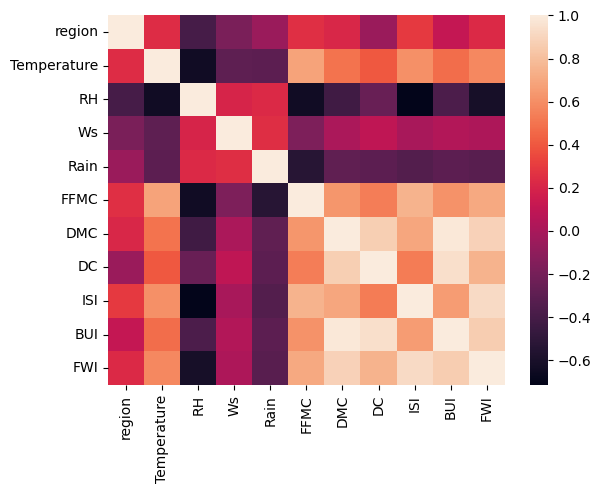

In [13]:
sns.heatmap(X_train.corr())

In [14]:
X_train.drop(['BUI', 'DC', 'FWI'], axis=1, inplace=True)
X_test.drop(['BUI', 'DC', 'FWI'], axis=1, inplace=True)

In [15]:
scaler = StandardScaler()

In [16]:
scaler.fit(X_train)

,copy,True
,with_mean,True
,with_std,True


In [17]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)

In [19]:
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [20]:
X_train

,region,Temperature,RH,Ws,Rain,FFMC,DMC,ISI
29,0,33,50,14,0.0,88.7,22.9,7.2
120,0,26,80,16,1.8,47.4,2.9,0.3
114,0,32,54,11,0.5,73.7,7.9,1.2
241,1,24,54,18,0.1,79.7,4.3,1.7
5,0,31,67,14,0.0,82.6,5.8,3.1
...,...,...,...,...,...,...,...,...
106,0,24,82,15,0.4,44.9,0.9,0.2
14,0,28,80,17,3.1,49.4,3.0,0.4
92,0,25,76,17,7.2,46.0,1.3,0.2
179,1,34,59,16,0.0,88.1,19.5,7.4


In [21]:
X_test

,region,Temperature,RH,Ws,Rain,FFMC,DMC,ISI
24,0,31,64,15,0.0,86.7,14.2,5.7
6,0,33,54,13,0.0,88.2,9.9,6.4
152,1,28,58,18,2.2,63.7,3.2,1.2
232,1,34,58,13,0.2,79.5,18.7,2.1
238,1,30,65,14,0.0,85.4,16.0,4.5
...,...,...,...,...,...,...,...,...
194,1,35,34,16,0.2,88.3,16.9,7.5
104,0,25,86,21,4.6,40.9,1.3,0.1
109,0,32,49,11,0.0,89.4,9.8,6.8
190,1,39,43,12,0.0,91.7,16.5,9.6


<Axes: >

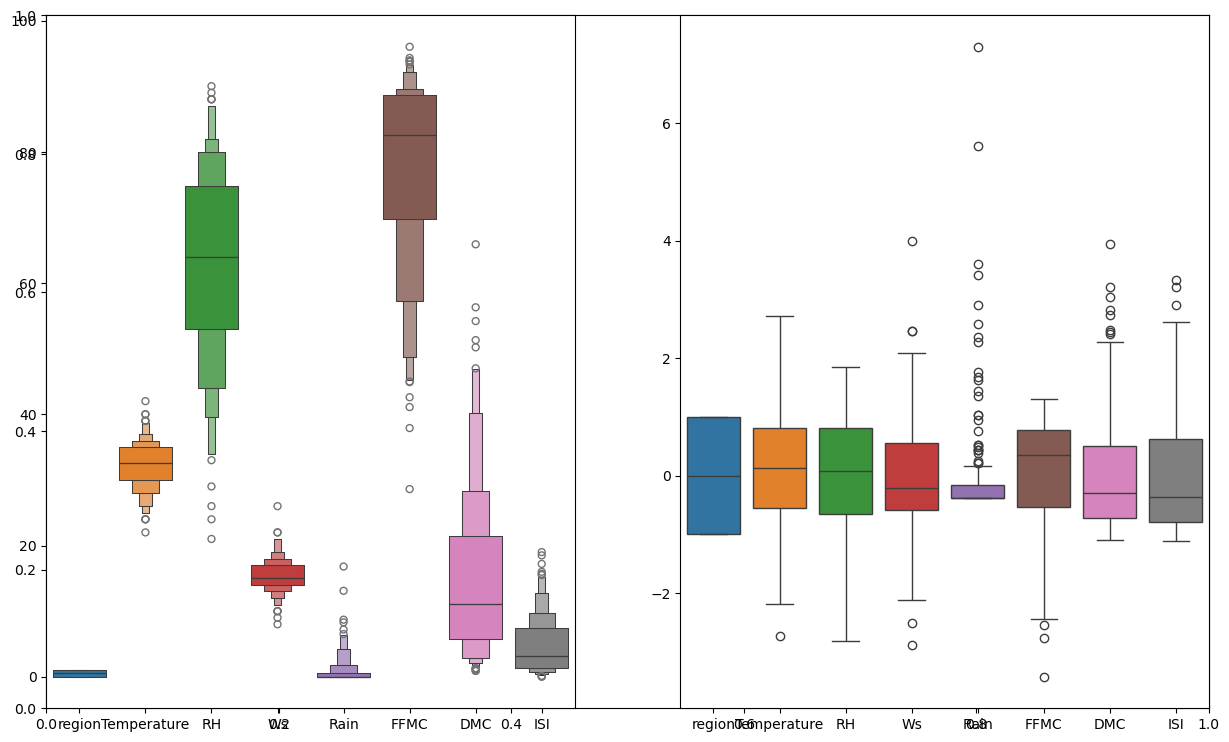

In [22]:
plt.subplots(figsize=(15,9))
plt.subplot(1,2,1)
sns.boxenplot(data=X_train)
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)

<Axes: >

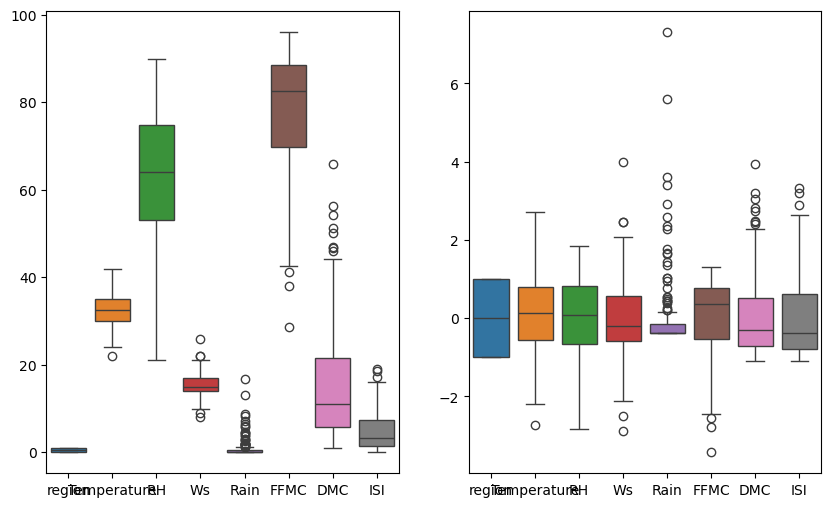

In [23]:

fig ,(ax1,ax2) = plt.subplots(ncols=2,figsize=(10,6))
# plt.title("X_Trained_Data")
sns.boxplot(data=X_train,ax=ax1)
sns.boxplot(data=X_train_scaled,ax=ax2)

# Logistic Regeression

In [26]:
model = LogisticRegression()
model.fit(X_train_scaled,Y_Train)
Y_predicted = model.predict(X_test_scaled)
mae = mean_absolute_error(Y_test,Y_predicted)
score = r2_score(Y_test,Y_predicted)

print(mae)
print(score)

0.0273972602739726
0.8855799373040752


In [29]:
# 4. Evaluation
acc = accuracy_score(Y_test,Y_predicted)
conf_mat = confusion_matrix(Y_test,Y_predicted)

In [30]:
acc

0.9726027397260274

In [32]:
conf_mat

array([[28,  1],
       [ 1, 43]])

In [35]:
# predict_proba returns two numbers for each row:
# [Probability of No Fire (0), Probability of Fire (1)]

# Let's check the first 5 rows of test data
sample_probs = model.predict_proba(X_test_scaled[:5])

print("--- Fire Risk Probabilities ---")
for i, prob in enumerate(sample_probs):
    # We want index [1] because that is the probability of CLASS 1 (Fire)
    risk_score = prob[1] * 100
    actual_label = Y_test.iloc[i]
    
    print(f"Row {i+1}: Risk = {risk_score:.2f}%  (Actual: {'Fire' if actual_label==1 else 'No Fire'})")

--- Fire Risk Probabilities ---
Row 1: Risk = 95.13%  (Actual: Fire)
Row 2: Risk = 96.69%  (Actual: Fire)
Row 3: Risk = 0.80%  (Actual: No Fire)
Row 4: Risk = 44.53%  (Actual: No Fire)
Row 5: Risk = 89.17%  (Actual: Fire)


In [37]:
import pickle


pickle.dump(model, open('model.pkl', 'wb'))

# Save the scaler
pickle.dump(scaler, open('scaler.pkl', 'wb'))

print("✅ Phase 2: Logistic Model and Scaler saved successfully!")

✅ Phase 2: Logistic Model and Scaler saved successfully!
